In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date, timedelta as dt

In [4]:
claims = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\claims.csv")
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
cust = pd.read_csv(r"C:\Users\abira\OneDrive\Desktop\Data Science 360\Python Projects\Python Foundation Case Study 3 - Insurance Claims Case Study\Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [6]:
## 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their 
## business significance.
## 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.

claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [7]:
claims['claim_id'] = claims.claim_id.astype('object')
claims['customer_id'] = claims['customer_id'].astype('object')
claims['claim_date'] = pd.to_datetime(claims.claim_date, format = '%m/%d/%Y')
claims['claim_amount'] = claims['claim_amount'].str.replace("$", "").astype('float64')
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   claim_id             1100 non-null   object        
 1   customer_id          1100 non-null   object        
 2   incident_cause       1100 non-null   object        
 3   claim_date           1100 non-null   datetime64[ns]
 4   claim_area           1100 non-null   object        
 5   police_report        1100 non-null   object        
 6   claim_type           1100 non-null   object        
 7   claim_amount         1035 non-null   float64       
 8   total_policy_claims  1090 non-null   float64       
 9   fraudulent           1100 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 86.1+ KB


In [8]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CUST_ID      1085 non-null   int64 
 1   gender       1085 non-null   object
 2   DateOfBirth  1085 non-null   object
 3   State        1085 non-null   object
 4   Contact      1085 non-null   object
 5   Segment      1085 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.0+ KB


In [9]:
cust['CUST_ID'] = cust.CUST_ID.astype('object')
cust.columns = ['CUST_ID', 'gender', 'Date_of_birth', 'State', 'Contact', 'Segment']
cust['Date_of_birth'] = pd.to_datetime(cust['Date_of_birth'], format = '%d-%b-%y')
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085 entries, 0 to 1084
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CUST_ID        1085 non-null   object        
 1   gender         1085 non-null   object        
 2   Date_of_birth  1085 non-null   datetime64[ns]
 3   State          1085 non-null   object        
 4   Contact        1085 non-null   object        
 5   Segment        1085 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 51.0+ KB


In [10]:
claims.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
477,75363718,48960366,Driver error,2018-04-04,Auto,No,Material and injury,31450.0,1.0,No
1087,45052103,55466148,Driver error,2017-12-03,Auto,No,Injury only,29010.0,1.0,No
1072,50800999,51669975,Other causes,2018-09-19,Home,Yes,Injury only,38950.0,1.0,No
613,47009317,42726730,Other causes,2018-05-07,Auto,Unknown,Material and injury,28400.0,1.0,No
831,85222695,83499843,Driver error,2017-12-17,Auto,No,Material and injury,18135.5,1.0,Yes


In [11]:
## 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
claims['police_report_found'] = np.where(claims['police_report'] == 'Yes', 1, 0)
claims['police_report_found'].value_counts()

police_report_found
0    930
1    170
Name: count, dtype: int64

In [12]:
## 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID
## should remain unique. Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

claims.drop_duplicates(subset = ['customer_id'], keep = 'last', inplace = True)
claims.shape

(1093, 11)

In [13]:
## 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

for i in claims.columns:
    print(claims[i].isnull().value_counts())

claim_id
False    1093
Name: count, dtype: int64
customer_id
False    1093
Name: count, dtype: int64
incident_cause
False    1093
Name: count, dtype: int64
claim_date
False    1093
Name: count, dtype: int64
claim_area
False    1093
Name: count, dtype: int64
police_report
False    1093
Name: count, dtype: int64
claim_type
False    1093
Name: count, dtype: int64
claim_amount
False    1028
True       65
Name: count, dtype: int64
total_policy_claims
False    1083
True       10
Name: count, dtype: int64
fraudulent
False    1093
Name: count, dtype: int64
police_report_found
False    1093
Name: count, dtype: int64


In [14]:
claims.total_policy_claims.mean().round(1)

1.6

In [15]:
claims['claim_amount'] = np.where(claims.claim_amount.isna(), claims.claim_amount.mean().round(2), claims.claim_amount)
claims['total_policy_claims'] = np.where(claims.total_policy_claims.isna(), claims.total_policy_claims.mean().round(1), claims.total_policy_claims)
claims.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_found
147,71767146,7208859,Crime,2017-07-01,Auto,No,Material only,1840.0,1.0,No,0
958,90284502,49170442,Other causes,2018-05-07,Auto,No,Material and injury,42872.0,1.0,Yes,0
1082,22690595,19888166,Other driver error,2017-05-15,Auto,Yes,Injury only,33080.0,2.0,No,1
54,25108581,91786228,Other driver error,2018-06-23,Auto,No,Material only,1150.0,1.0,Yes,0
980,7944120,23094322,Other causes,2018-08-10,Home,Yes,Material and injury,35800.0,1.0,No,1


In [16]:
for i in cust.columns:
    print(cust[i].isna().value_counts())

CUST_ID
False    1085
Name: count, dtype: int64
gender
False    1085
Name: count, dtype: int64
Date_of_birth
False    1085
Name: count, dtype: int64
State
False    1085
Name: count, dtype: int64
Contact
False    1085
Name: count, dtype: int64
Segment
False    1085
Name: count, dtype: int64


In [17]:
## 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
## Children < 18
## Youth 18-30
## Adult 30-60
## Senior > 60

In [18]:
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

cust['Age'] = cust.Date_of_birth.apply(calculate_age)

cust['Age_cat'] = np.where(cust.Age < 18, 'Children', 
                    np.where(cust.Age <= 30, 'Youth',
                    np.where(cust.Age <= 60, 'Adult', 'Senior')))
cust.Age_cat.value_counts()

Age_cat
Adult       645
Children    246
Youth       194
Name: count, dtype: int64

In [19]:
cust.head()

,CUST_ID,gender,Date_of_birth,State,Contact,Segment,Age,Age_cat
0,21868593,Female,1979-01-12,VT,789-916-8172,Platinum,45,Adult
1,75740424,Female,1970-01-13,ME,265-543-1264,Silver,54,Adult
2,30308357,Female,1984-03-11,TN,798-631-4758,Silver,40,Adult
3,47830476,Female,1986-05-01,MA,413-187-7945,Silver,38,Adult
4,19269962,Male,1977-05-13,NV,956-871-8691,Gold,47,Adult


In [20]:
## 8. What is the average amount claimed by the customers from various segments?

insurance360 = pd.merge(claims, cust, left_on = 'customer_id', right_on = 'CUST_ID', how = 'left')
insurance360.drop('CUST_ID', axis = 1, inplace = True)
insurance360.sample(5)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_found,gender,Date_of_birth,State,Contact,Segment,Age,Age_cat
886,4607758,90085898,Natural causes,2018-10-03,Auto,No,Material only,3116.50,1.0,Yes,0,Female,2065-02-26,AK,789-783-8149,Platinum,-41.0,Children
732,58878919,29323970,Driver error,2017-01-01,Auto,Unknown,Material only,1840.00,1.0,Yes,0,Male,1971-03-03,NE,783-653-9163,Gold,53.0,Adult
585,68461060,30831279,Other causes,2017-01-27,Auto,Yes,Injury only,20720.00,1.0,No,1,Male,1984-05-28,ME,516-973-5972,Silver,40.0,Adult
1041,7180084,608461,Crime,2018-07-14,Auto,No,Material only,2630.00,1.0,No,0,Male,1994-12-17,AR,963-187-2873,Platinum,29.0,Youth
981,12015495,89364843,Other causes,2017-09-27,Auto,No,Material only,12475.27,1.0,No,0,Male,1969-01-05,SD,837-432-3471,Gold,55.0,Adult


In [21]:
insurance360.groupby('Age_cat')['claim_amount'].mean().round(2)

Age_cat
Adult       12989.28
Children    11659.64
Youth       11938.33
Name: claim_amount, dtype: float64

In [22]:
## 9.  What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

date = pd.to_datetime('01-10-2018', dayfirst = True)
cutoff = date - timedelta(days = 20)
cutoff = str(cutoff.date())
## cutoff = pd.to_datetime(cutoff)
cutoff = pd.to_datetime(cutoff, format = '%Y-%m-%d')
print(type(cutoff))

NameError: name 'timedelta' is not defined

In [ ]:
claims.info()

In [ ]:
claims.loc[claims.claim_date < cutoff, 'claim_id'].count()

In [ ]:
## 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

insurance360.incident_cause.value_counts()

In [ ]:
insurance360.loc[(insurance360.incident_cause.isin(['Driver error', 'Other driver error']))
             & (insurance360.State.isin(['TX','DE','AK'])) & (insurance360.Age_cat == 'Adult'),:].groupby(by = "State")['total_policy_claims'].count()

In [ ]:
insurance360.claim_amount.sum()

In [ ]:
## Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a 
## percentage on the pie chart.

female_percent = ((insurance360.loc[insurance360.gender == 'Female', 'claim_amount'].sum() / insurance360.claim_amount.sum())*100).round(2)
male_percent = ((insurance360.loc[insurance360.gender == 'Male', 'claim_amount'].sum() / insurance360.claim_amount.sum())*100).round(2)

segments = pd.DataFrame(insurance360.groupby(['Segment', 'gender'])['claim_amount'].sum().reset_index())
segments['percent'] = ((segments.claim_amount / segments.claim_amount.sum())*100).round(2)
segments

In [ ]:
plt.figure(figsize = (12,5))
plt.pie(segments.claim_amount, labels = segments.percent)
plt.title("Percentages of claims amounts by gender and segment")
plt.legend(segments.Segment + " " + segments.gender, loc = 'lower right')
plt.show()

In [ ]:
## . Among males and females, which gender had claimed the most for any type of driver related issues? E.g. 
## This metric can be compared using a bar chart

t1 = insurance360.loc[(insurance360.incident_cause.isin(['Driver error', 'Other driver error']))].groupby("gender")[["total_policy_claims"]].count()


t1.plot(kind = 'bar')

In [ ]:
## Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

t2 = insurance360.loc[(insurance360.fraudulent == 'Yes')].groupby('Age_cat')['claim_id'].count()
t2.plot(kind = 'bar')

In [ ]:
insurance360.sample()

In [31]:
## 14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
## Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

insurance360['Month'] = insurance360.claim_date.dt.month
t3 = insurance360.groupby('Month')['claim_amount'].sum()
t3 = pd.DataFrame(t3)
t3['month'] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
t3.reset_index(inplace = True)
t3.drop('Month', axis = 1, inplace = True)
t3 = t3[['month', 'claim_amount']]
t3

,month,claim_amount
0,Jan,1326985.39
1,Feb,1188011.58
2,Mar,1348467.85
3,Apr,1293901.04
4,May,1115279.66
5,Jun,1318741.12
6,Jul,1382767.93
7,Aug,913506.31
8,Sep,982935.70
9,Oct,1415648.66


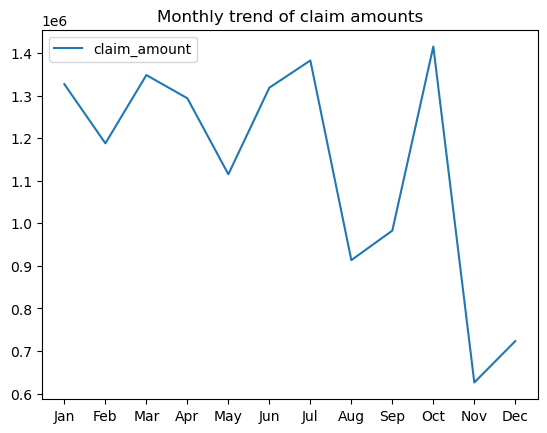

In [46]:
c1 = t3.plot()
c1.set_xticks(range(len(t3.month)))
c1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Monthly trend of claim amounts')
plt.show()

In [83]:
## 15. What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, 
## one facet that represents fraudulent claims and the other for non-fraudulent claims.

t4 = pd.pivot_table(insurance360, index = ['fraudulent', 'Age_cat', 'gender'], values = 'claim_amount', aggfunc = 'mean').reset_index()
t4

,fraudulent,Age_cat,gender,claim_amount
0,No,Adult,Female,12306.199247
1,No,Adult,Male,12594.842231
2,No,Children,Female,12305.084432
3,No,Children,Male,11600.575361
4,No,Youth,Female,12805.881067
5,No,Youth,Male,12387.609880
6,Yes,Adult,Female,13876.578611
7,Yes,Adult,Male,15500.374937
8,Yes,Children,Female,6440.328571
9,Yes,Children,Male,16923.860000


C:\Users\abira\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


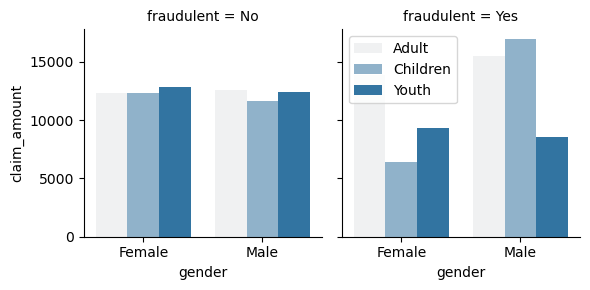

In [85]:
p4 = sns.FacetGrid(data = t4, col = 'fraudulent')
hue_order = ['Adult','Children','Youth']
p4.map(sns.barplot,'gender', 'claim_amount','Age_cat',hue_order = hue_order)
plt.legend()
plt.ticklabel_format(style = 'plain',axis = 'y')
plt.show()

In [91]:
## 16. Is there any similarity in the amount claimed by males and females?

pd.pivot_table(insurance360, index = ['gender', 'fraudulent'], values = 'claim_amount', aggfunc = 'sum')

claim_amount
gender fraudulent              
Female No            4984470.13
       Yes           1391834.20
Male   No            5314732.83
       Yes           1783864.39

There is a lot of similarity among the non-fraudulent cases. Across age groups as well, the average and the full amount claimed is approximately 
the same. The differences come in the fraudulent cases, with the difference showing in the age groups. 

In [95]:
## 17. Is there any relationship between age category and segment?

insurance360.groupby(['Age_cat', 'Segment'])['claim_amount'].describe()

count          mean           std     min       25%  \
Age_cat  Segment                                                         
Adult    Gold      225.0  13191.502444  13565.872479  1000.0  1840.000   
         Platinum  214.0  12776.893271  13463.201068  1000.0  1880.000   
         Silver    202.0  12989.045000  13458.494204  1020.0  2090.000   
Children Gold       81.0  12863.550370  13502.566832  1090.0  2110.000   
         Platinum   83.0  11302.377711  13405.354953  1050.0  2125.000   
         Silver     81.0  10821.806296  13002.783655  1050.0  1680.000   
Youth    Gold       65.0  11621.489385  12859.196908  1060.0  1730.000   
         Platinum   64.0  12397.156875  13832.062534  1060.0  2191.125   
         Silver     63.0  11799.129524  12688.153162  1000.0  2100.000   

                      50%      75%      max  
Age_cat  Segment                             
Adult    Gold      2920.0  24220.0  47748.0  
         Platinum  2890.0  24898.5  47610.0  
         Silver    2965.0  23115.0  48150.5  
Children Gold      3093.5  23940.0  44367.0  
         Platinum  2540.0  20825.0  48035.5  
         Silver    2700.0  19530.0  41365.5  
Youth    Gold      2550.0  20630.0  41850.0  
         Platinum  2840.0  22510.0  44838.5  
         Silver    2840.0  19415.0  45287.0

Within the age groups, the claim amounts, numbers and averages are relatively similar. However the Adult group has the most number of claims
across all segments. The average amounts show no correlation between segment or age group. Overall, I would say not a significant relationship. 

In [101]:
## 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

insurance360['Year'] = insurance360.claim_date.dt.year
insurance360.groupby('Year')['claim_amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2017,602.0,12290.519718,13266.748945,1000.0,1934.875,2840.0,22562.5,48150.5
2018,491.0,12701.778371,13466.581949,1000.0,1930.250,2875.0,23502.5,48035.5


In [105]:
fiscal_cutoff2017 = pd.to_datetime('30-09-2017', dayfirst = True)
insurance360.loc[insurance360.claim_date < fiscal_cutoff2017, 'claim_amount'].sum()

5437415.75

In [106]:
insurance360.loc[insurance360.claim_date >= fiscal_cutoff2017, 'claim_amount'].sum()

8198050.300000001

In [107]:
insurance360.loc[insurance360.claim_date < fiscal_cutoff2017, 'claim_amount'].describe()

count      448.000000
mean     12137.088728
std      13216.790524
min       1000.000000
25%       1847.500000
50%       2820.000000
75%      21740.000000
max      48150.500000
Name: claim_amount, dtype: float64

In [108]:
insurance360.loc[insurance360.claim_date >= fiscal_cutoff2017, 'claim_amount'].describe()

count      645.000000
mean     12710.155504
std      13450.869850
min       1000.000000
25%       2000.000000
50%       2880.000000
75%      23740.000000
max      48035.500000
Name: claim_amount, dtype: float64

There were less claims in the fiscal year 2016 - 2017 therefore, leading to lower amount of claims. However, when looking at the mean and
the standard deviation, it is relatively similar. 

In [111]:
## 19. Is there any difference between age groups and insurance claims?

insurance360.groupby('Age_cat')['claim_area'].value_counts()

Age_cat   claim_area
Adult     Auto          570
          Home           71
Children  Auto          223
          Home           22
Youth     Auto          171
          Home           21
Name: count, dtype: int64

In [114]:
insurance360.groupby('Age_cat')['claim_type'].value_counts()

Age_cat   claim_type         
Adult     Material only          370
          Material and injury    146
          Injury only            125
Children  Material only          155
          Material and injury     60
          Injury only             30
Youth     Material only          122
          Injury only             39
          Material and injury     31
Name: count, dtype: int64

In [115]:
insurance360.groupby('Age_cat')['incident_cause'].value_counts()

Age_cat   incident_cause    
Adult     Other causes          167
          Driver error          162
          Other driver error    147
          Natural causes        111
          Crime                  54
Children  Other causes           69
          Other driver error     53
          Driver error           51
          Natural causes         39
          Crime                  33
Youth     Other causes           48
          Driver error           46
          Other driver error     43
          Natural causes         35
          Crime                  20
Name: count, dtype: int64

In [117]:
insurance360.groupby('Age_cat')['fraudulent'].value_counts()

Age_cat   fraudulent
Adult     No            490
          Yes           151
Children  No            185
          Yes            60
Youth     No            158
          Yes            34
Name: count, dtype: int64

In [118]:
insurance360.groupby('Age_cat')['police_report'].value_counts()

Age_cat   police_report
Adult     No               348
          Unknown          197
          Yes               96
Children  No               152
          Unknown           58
          Yes               35
Youth     No               115
          Unknown           40
          Yes               37
Name: count, dtype: int64

In [119]:
insurance360.groupby('Age_cat')['Segment'].value_counts()

Age_cat   Segment 
Adult     Gold        225
          Platinum    214
          Silver      202
Children  Platinum     83
          Gold         81
          Silver       81
Youth     Gold         65
          Platinum     64
          Silver       63
Name: count, dtype: int64

In [116]:
insurance360.sample()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,police_report_found,gender,Date_of_birth,State,Contact,Segment,Age,Age_cat,Month,Year
803,68826444,42351519,Other causes,2017-04-25,Auto,No,Material only,2800.0,2.0,No,0,Female,1979-07-03,GA,237-467-4729,Gold,45.0,Adult,4,2017


In [128]:
## 20. Is there any relationship between total number of policy claims and the claimed amount?

insurance360.groupby('total_policy_claims')['claim_amount'].sum().reset_index().sort_values(by = 'claim_amount', ascending = False)
## (reminder that the 1.6 is the averge number substituted for outliers)

,total_policy_claims,claim_amount
0,1.0,9828304.23
2,2.0,1470505.08
3,3.0,1115188.12
4,4.0,659412.54
5,5.0,230332.04
6,6.0,142875.27
1,1.6,139505.27
7,7.0,46066.00
8,8.0,3277.50


In [ ]:
The most amount of money claimed has some from those with only one policy claim, and everything after that is pretty proportional.
The least amount of money claimed has come from those with the most policy claims. 